In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/homeprices.csv')

In [25]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [27]:
encoder = OneHotEncoder()

In [28]:
town_en = encoder.fit_transform(df[['town']])

In [29]:
town = town_en.toarray()

In [30]:
town = pd.DataFrame(town , columns =df["town"].unique())

In [31]:
town

,monroe township,west windsor,robinsville
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [36]:
X =  pd.concat([town , df["area"]] ,axis=1 )

In [37]:
y = df.price

In [38]:
X 

,monroe township,west windsor,robinsville,area
0,1.0,0.0,0.0,2600
1,1.0,0.0,0.0,3000
2,1.0,0.0,0.0,3200
3,1.0,0.0,0.0,3600
4,1.0,0.0,0.0,4000
5,0.0,0.0,1.0,2600
6,0.0,0.0,1.0,2800
7,0.0,0.0,1.0,3300
8,0.0,0.0,1.0,3600
9,0.0,1.0,0.0,2600


In [39]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [43]:
model.fit(X , y)

LinearRegression()

In [44]:
model.score(X ,y)

0.9573929037221873

# Excersize :


In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv")

In [58]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [59]:
import matplotlib.pyplot as plt

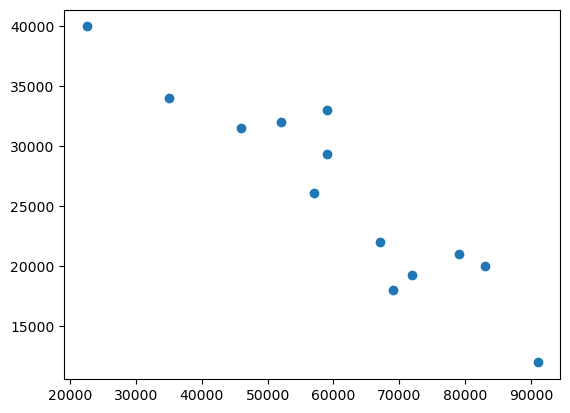

In [60]:
plt.scatter(df["Mileage"], df["Sell Price($)"])

In [64]:
df = pd.get_dummies(data = df , columns=["Car Model"] , drop_first=True)

In [65]:
df

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [69]:
X = df.drop("Sell Price($)", axis=1) 

In [70]:
y =df["Sell Price($)"]

In [66]:
model = LinearRegression()

In [74]:
model.fit(X,y)

LinearRegression()

In [76]:
model.score(X,y)

0.9417050937281082

In [77]:
model.predict([[45000,4,0,0]])

C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34537.77647335])

In [78]:
model.predict([[86000,7,0,1]])

C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17818.95045785])